Astronomy and Astrophysics Summer School-2025,India Space Academy.  
Submitted by,  
Student Name: Nilanjana Bagchi Aurpa  
Institution Name: Miranda House , University of Delhi  
Institution Roll No: 2022/1336  
ISA Admission No: 347208

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
#from astropy.constants import c
#from astropy import units as u

In [ ]:
data = pd.read_csv('Pantheon+SH0ES.dat', delimiter=' ')

In [ ]:
dm = data['MU_SH0ES'].values
dmerr = data['MU_SH0ES_ERR_DIAG'].values
z = data['zHD'].values

In [ ]:
c = 299792.458

In [ ]:
def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

In [ ]:
def luminosity_distance(z, H0, Omega_m):
    if np.isscalar(z):
        z = np.array([z])
    dL = []
    for zi in z:
        integral, _ = quad(lambda zp: 1.0 / E(zp, Omega_m), 0, zi)
        dL_val = (c / H0) * (1 + zi) * integral
        dL.append(dL_val)
    return np.array(dL)  # in Mpc


In [ ]:
def mu_theory(z,H0,Omega_m):
    dL = luminosity_distance(z, H0, Omega_m)
    mu = 5 * np.log10(dL) + 25  # dL.value is in Mpc
    return mu

In [ ]:
#Initial guess:
H_Guess = 70
omega_m = 0.3
H0 = 70
p0 = [H_Guess,omega_m]

In [ ]:
popt, pcov = curve_fit(mu_theory, z, dm, sigma=dmerr, p0=p0, absolute_sigma=True)


In [ ]:
H0_fit, Omega_m_fit = popt
H0_err, Omega_m_err = np.sqrt(np.diag(pcov))

# Print results
print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Omega_m = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")

Fitted H0 = 72.97 ± 0.26 km/s/Mpc
Fitted Omega_m = 0.351 ± 0.019


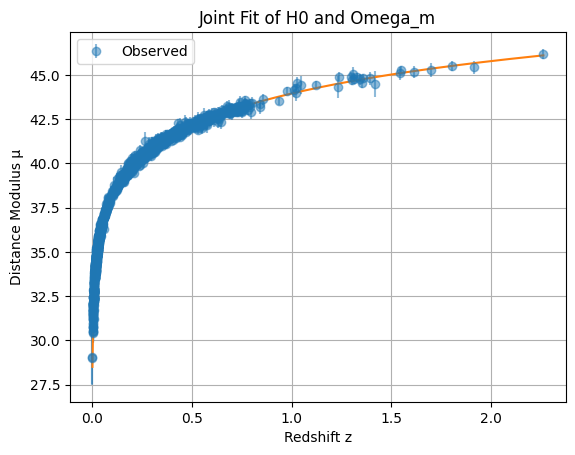

In [ ]:
z_plot = np.linspace(min(z), max(z), 500)
mu_model = mu_theory(z_plot, H0_fit, Omega_m_fit)

plt.errorbar(z, dm, yerr=dmerr, fmt='o', alpha=0.5, label='Observed')
plt.plot(z_plot, mu_model)
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus μ")
plt.title("Joint Fit of H0 and Omega_m")
plt.grid()
plt.legend()
plt.savefig("hubble_constant_omega_fit.png", dpi=300)
plt.show()

In [ ]:
def age_integrand(z, H0, omega_m):
    return 1 / ((1 + z) * E(z, omega_m))
def compute_age(H0, omega_m):
    integral, _ = quad(age_integrand, 0, np.inf, args=(H0, omega_m))
    return integral / (H0 / 3.0857e19) / (60 * 60 * 24 * 365.25 * 1e9)

In [ ]:
age = compute_age(H0_fit, Omega_m_fit)
print(f"Estimated age of the Universe: {age:.2f} Gyr")

Estimated age of the Universe: 12.36 Gyr


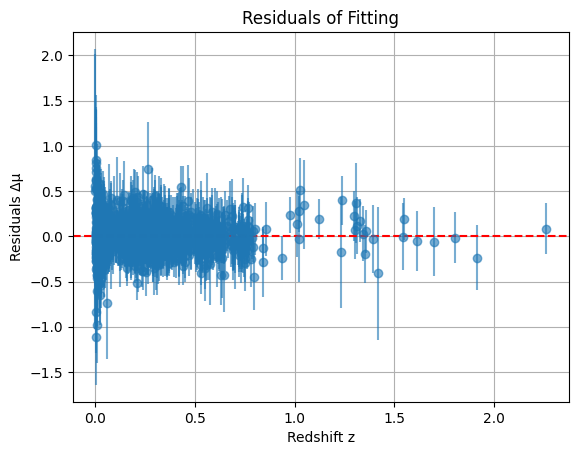

In [ ]:
mu_fit = mu_theory(z, H0_fit,Omega_m_fit)
residuals = dm - mu_fit
plt.errorbar(z, residuals, yerr=dmerr, fmt='o', alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Redshift z')
plt.ylabel('Residuals Δμ')
plt.title('Residuals of Fitting')
plt.grid()
plt.savefig("hubble_residual_fit.png", dpi=300)
plt.show()



In [ ]:
# Low-z vs High-z spilt
Omega_m_fixed = 0.3
z_split = 0.1

# Define model with fixed Omega_m
def mu_theory_fixed_Omega(z, H0):
    return mu_theory(z, H0, Omega_m_fixed)

# Split data
low_mask = z < z_split
high_mask = z >= z_split

# Fit low-z
H0_low, cov_low = curve_fit(mu_theory_fixed_Omega, z[low_mask], dm[low_mask], sigma=dmerr[low_mask], absolute_sigma=True)
H0_low_err = np.sqrt(np.diag(cov_low))[0]

# Fit high-z
H0_high, cov_high = curve_fit(mu_theory_fixed_Omega, z[high_mask], dm[high_mask], sigma=dmerr[high_mask], absolute_sigma=True)
H0_high_err = np.sqrt(np.diag(cov_high))[0]

print(f"Low-z (z < {z_split}): H₀ = {H0_low[0]:.2f} ± {H0_low_err:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high[0]:.2f} ± {H0_high_err:.2f} km/s/Mpc")

# Plot Hubble diagram with both fits
z_grid = np.linspace(min(z), max(z), 500)
mu_low = mu_theory(z_grid, H0_low[0], Omega_m_fixed)
mu_high = mu_theory(z_grid, H0_high[0], Omega_m_fixed)

Low-z (z < 0.1): H₀ = 73.01 ± 0.28 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.85 ± 0.22 km/s/Mpc


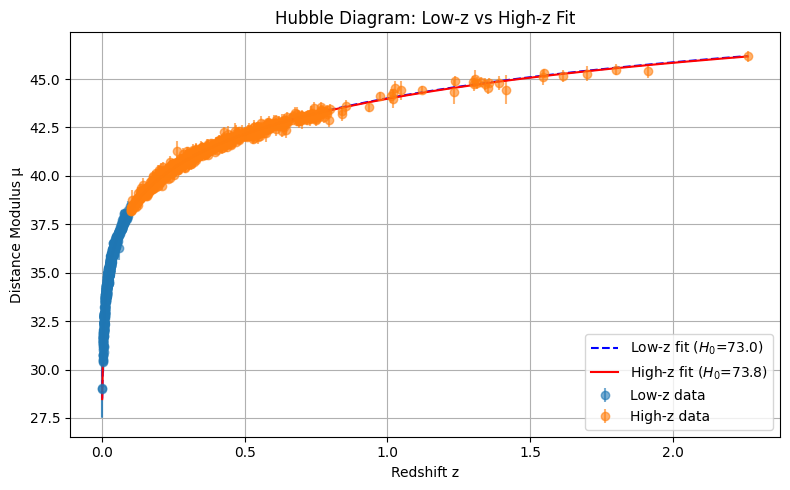

In [ ]:
plt.figure(figsize=(8, 5))
plt.errorbar(z[low_mask], dm[low_mask], yerr=dmerr[low_mask], fmt='o', alpha=0.6, label='Low-z data')
plt.errorbar(z[high_mask], dm[high_mask], yerr=dmerr[high_mask], fmt='o', alpha=0.6, label='High-z data')

plt.plot(z_grid, mu_low, 'b--', label=fr'Low-z fit ($H_0$={H0_low[0]:.1f})')
plt.plot(z_grid, mu_high, 'r-', label=fr'High-z fit ($H_0$={H0_high[0]:.1f})')

plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus μ")
plt.title(r"Hubble Diagram: Low-z vs High-z Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("hubble_low_high_fit.png", dpi=300)
plt.show()